In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

C:\Users\Suman\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train = pd.read_csv('House_price_data/train.csv', index_col = 'Id')
train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### DATA Cleaning

In [3]:
train.shape

(1460, 80)

In [4]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot:>

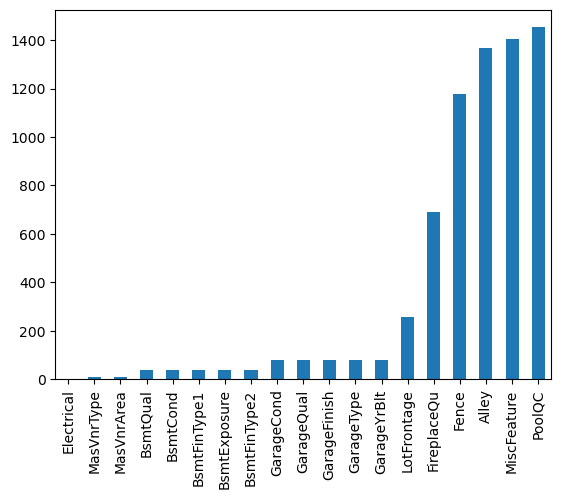

In [5]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [6]:
missing

Electrical         1
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
LotFrontage      259
FireplaceQu      690
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64

In [7]:
# droping which has more than 200 missing values
train = train.drop(missing[missing>200].index, axis = 1)

In [8]:
for col in ['GarageCond', 'GarageQual', 'GarageFinish', 'GarageType']:#, 'GarageYrBlt']:
    train[col] = train[col].replace(np.nan, 'NA')

In [9]:
#train['GarageYrBlt'] = train['GarageYrBlt'].astype('str')

In [10]:
def fill_missing_values(data):
    for column in data.columns:
        if data[column].dtype == 'object':
            # For categorical columns, fill missing values with the most frequent value (mode)
            mode = data[column].mode().iloc[0]
            data[column].fillna(mode, inplace=True)
        elif column != 'object' and column != 'GarageYrBlt':
            # For numeric columns, fill missing values with the median
            median = data[column].median()
            data[column].fillna(median, inplace=True)
fill_missing_values(train)

In [11]:
num_col = [f for f in train.columns if train.dtypes[f] != 'object']
cat_col = [f for f in train.columns if train.dtypes[f] == 'object']

<AxesSubplot:title={'center':'Log Normal'}, xlabel='SalePrice'>

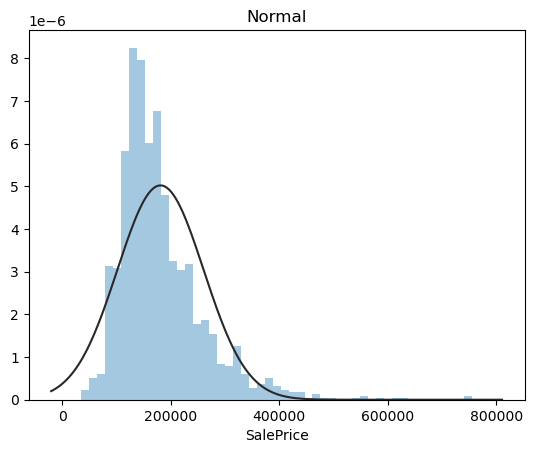

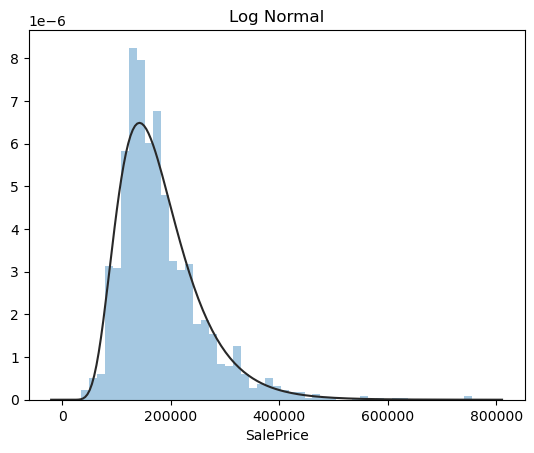

In [12]:
y = train['SalePrice']
plt.figure(1); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(2); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

<AxesSubplot:>

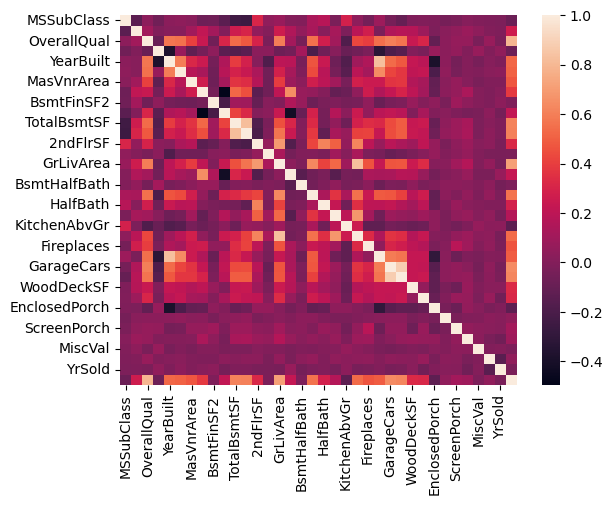

In [13]:
corrmat = train[num_col].corr()
sns.heatmap(corrmat)

In [14]:
print("Top 10 features corelated to SalePice:\n", corrmat['SalePrice'].sort_values(ascending = False)[:20])
print("---"*10)
print()
print("Last 5 features corelated to SalePice:\n", corrmat['SalePrice'].sort_values(ascending = False)[-5:])

Top 10 features corelated to SalePice:
 SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.472614
Fireplaces      0.466929
BsmtFinSF1      0.386420
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
Name: SalePrice, dtype: float64
------------------------------

Last 5 features corelated to SalePice:
 YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [15]:
important_num_cols = list(corrmat["SalePrice"][(corrmat["SalePrice"]>0.50) | (corrmat["SalePrice"]<-0.50)].index)
important_num_cols.remove('SalePrice')

In [16]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

vif_df = calc_vif(train[important_num_cols])

vif_df

,variables,VIF
0,OverallQual,48.259362
1,YearBuilt,8160.729383
2,YearRemodAdd,8011.544572
3,TotalBsmtSF,24.318006
4,1stFlrSF,36.834107
5,GrLivArea,46.000994
6,FullBath,17.882539
7,TotRmsAbvGrd,56.699800
8,GarageCars,34.022038
9,GarageArea,29.078616


In [17]:
important_num_cols.remove('YearBuilt')
important_num_cols.remove('YearRemodAdd')
important_num_cols.remove('GarageCars')
important_num_cols.remove('1stFlrSF')
important_num_cols.remove('TotRmsAbvGrd')
important_num_cols.remove('OverallQual')
vif_df = calc_vif(train[important_num_cols])

vif_df

,variables,VIF
0,TotalBsmtSF,9.058591
1,GrLivArea,17.125365
2,FullBath,13.737477
3,GarageArea,8.691456


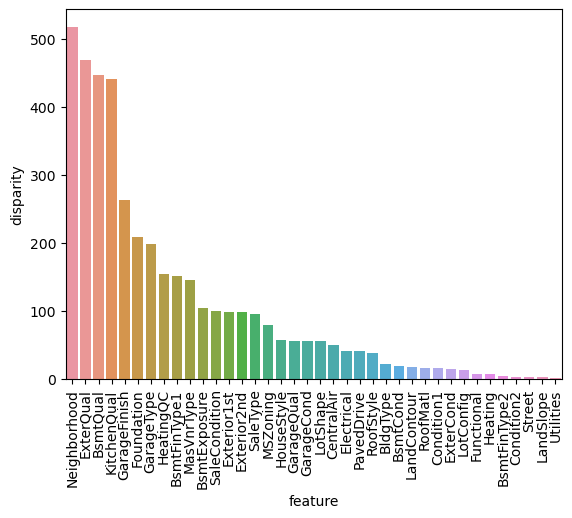

In [19]:
cat_col = [f for f in train.columns if train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['feature'] = cat_col
    pvals = []
    for c in cat_col:
        samples = []
        for cls in frame[c].unique():
            s = frame[frame[c] == cls]['SalePrice'].values
            samples.append(s)
        pval = st.f_oneway(*samples)[1]
        pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

a = anova(train)
a['disparity'] = np.log(1./a['pval'].values)
sns.barplot(data=a, x='feature', y='disparity')
x=plt.xticks(rotation=90)

In [20]:
a

,feature,pval,disparity
7,Neighborhood,1.558600e-225,517.637858
17,ExterQual,1.439551e-204,469.363028
20,BsmtQual,2.078120e-194,445.970044
29,KitchenQual,3.032213e-192,440.987045
32,GarageFinish,6.228747e-115,262.968110
19,Foundation,5.791895e-91,207.778784
31,GarageType,6.117026e-87,198.513827
26,HeatingQC,2.667062e-67,153.292224
23,BsmtFinType1,3.598398e-66,150.690127
16,MasVnrType,1.279704e-63,144.816232


In [21]:
important_cat_cols = a['feature'][a['disparity']> 150].values
important_cat_cols

array(['Neighborhood', 'ExterQual', 'BsmtQual', 'KitchenQual',
       'GarageFinish', 'Foundation', 'GarageType', 'HeatingQC',
       'BsmtFinType1'], dtype=object)

In [22]:
imp_cols = list(important_num_cols) + list(important_cat_cols) + ['SalePrice']

In [23]:
new_train = train[imp_cols]

<AxesSubplot:xlabel='Neighborhood'>

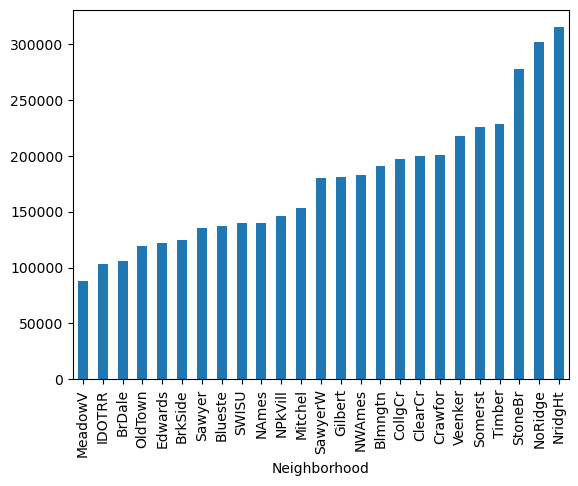

In [24]:
#grouping neighborhood variable based on this plot
new_train['SalePrice'].groupby(new_train['Neighborhood']).median().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Foundation'>

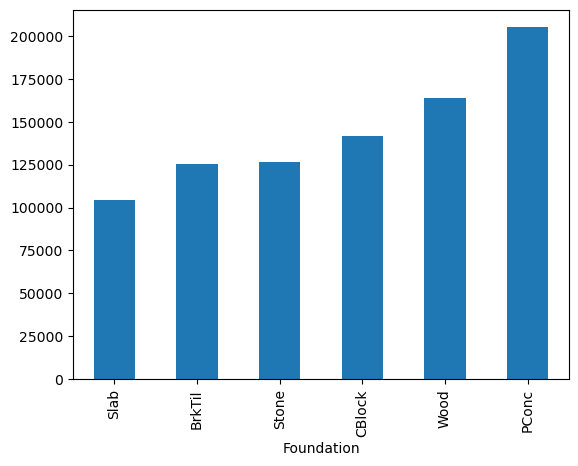

In [25]:
new_train['SalePrice'].groupby(new_train['Foundation']).median().sort_values().plot(kind='bar')

<AxesSubplot:xlabel='GarageType'>

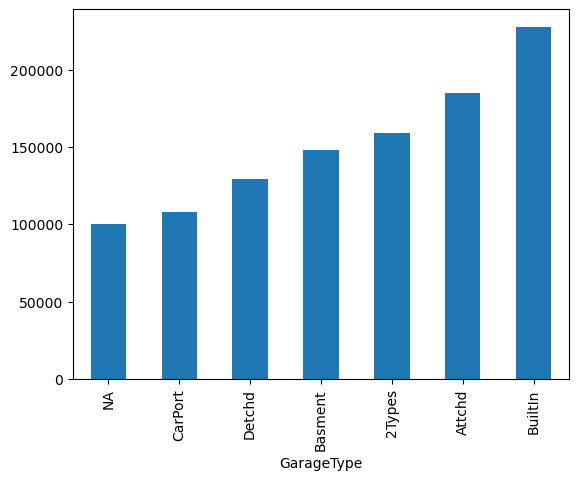

In [26]:
new_train['SalePrice'].groupby(new_train['GarageType']).median().sort_values().plot(kind= 'bar')

In [27]:
neighborhood_map = {"MeadowV" : 0, "IDOTRR" : 1, "BrDale" : 1, "OldTown" : 1, "Edwards" : 1, "BrkSide" : 1, "Sawyer" : 1,
                    "Blueste" : 1, "SWISU" : 1, "NAmes" : 1, "NPkVill" : 1, "Mitchel" : 1, "SawyerW" : 2, "Gilbert" : 2, 
                    "NWAmes" : 2, "Blmngtn" : 2, "CollgCr" : 2, "ClearCr" : 2, "Crawfor" : 2, "Veenker" : 3, 
                    "Somerst" : 3, "Timber" : 3, "StoneBr" : 4, "NoRidge" : 4, "NridgHt" : 4}
ExterQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po': 1}
BsmtQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po': 1, 'NA':0}
KitchenQual_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po': 1}
GarageFinish_map = {'Fin':4, 'RFn': 3, 'Unf': 2, 'NA': 1}
Foundation_map = {'PConc':5, 'Wood': 4, 'CBlock': 3, 'Stone': 2, 'BrkTil': 1, 'Slab': 0}
GarageType_map = {'BuiltIn':5, 'Attchd':4 , '2Types':3 , 'Detchd':2, 'CarPort':1, 'NA': 0}
HeatingQC_map = {'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po': 1}
BsmtFinType1_map = {'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'NA':0}

new_train['Neighborhood_LE'] = new_train['Neighborhood'].map(neighborhood_map)
new_train['ExterQual_LE'] = new_train['ExterQual'].map(ExterQual_map)
new_train['BsmtQual_LE'] = new_train['BsmtQual'].map(BsmtQual_map)
new_train['KitchenQual_LE'] = new_train['KitchenQual'].map(KitchenQual_map)
new_train['GarageFinish_LE'] = new_train['GarageFinish'].map(GarageFinish_map)
new_train['HeatingQC_LE'] = new_train['HeatingQC'].map(HeatingQC_map)
new_train['BsmtFinType1_LE'] = new_train['BsmtFinType1'].map(BsmtFinType1_map)

In [28]:
new_train = new_train.drop(important_cat_cols, axis=1)

In [29]:
new_train.columns

Index(['TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageArea', 'SalePrice',
       'Neighborhood_LE', 'ExterQual_LE', 'BsmtQual_LE', 'KitchenQual_LE',
       'GarageFinish_LE', 'HeatingQC_LE', 'BsmtFinType1_LE'],
      dtype='object')

In [30]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   TotalBsmtSF      1460 non-null   int64
 1   GrLivArea        1460 non-null   int64
 2   FullBath         1460 non-null   int64
 3   GarageArea       1460 non-null   int64
 4   SalePrice        1460 non-null   int64
 5   Neighborhood_LE  1460 non-null   int64
 6   ExterQual_LE     1460 non-null   int64
 7   BsmtQual_LE      1460 non-null   int64
 8   KitchenQual_LE   1460 non-null   int64
 9   GarageFinish_LE  1460 non-null   int64
 10  HeatingQC_LE     1460 non-null   int64
 11  BsmtFinType1_LE  1460 non-null   int64
dtypes: int64(12)
memory usage: 148.3 KB


In [31]:
new_train.shape

(1460, 12)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_train[important_num_cols])
scaled = scaler.transform(new_train[important_num_cols])

for i, col in enumerate(important_num_cols):
       new_train[col] = scaled[:,i]


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

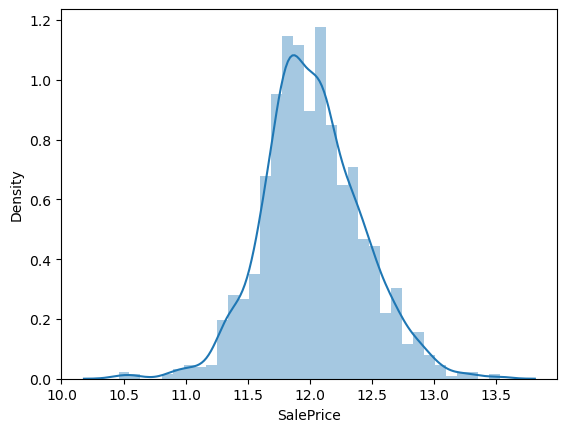

In [33]:
# log transform
new_train['SalePrice'] = np.log(new_train['SalePrice'])

sns.distplot(new_train['SalePrice'])

In [34]:
# outliers detection
lower_limit = new_train['SalePrice'].mean() - 3*new_train['SalePrice'].std()
upper_limit = new_train['SalePrice'].mean() + 3*new_train['SalePrice'].std()
print(lower_limit, upper_limit)

10.825695296325879 13.222406505892867


In [35]:
# ouliers detection
new_train['SalePrice'][(new_train['SalePrice']>lower_limit) & (new_train['SalePrice'] < upper_limit)].count()

1448

In [36]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()

In [37]:
X = new_train.drop(['SalePrice'], axis = 1)
y = new_train['SalePrice']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
from sklearn.feature_selection import RFE

selector = RFE(regr, n_features_to_select=10, step=1)

selector.fit(X_train, y_train)

print(selector.support_)

print(selector.ranking_)

[ True  True False  True  True  True  True  True  True  True  True]
[1 1 2 1 1 1 1 1 1 1 1]


In [40]:
X_train = X_train.drop(X.columns[2], axis = 1)
X_test = X_test.drop(X.columns[2], axis = 1)

In [41]:
X_train.columns

Index(['TotalBsmtSF', 'GrLivArea', 'GarageArea', 'Neighborhood_LE',
       'ExterQual_LE', 'BsmtQual_LE', 'KitchenQual_LE', 'GarageFinish_LE',
       'HeatingQC_LE', 'BsmtFinType1_LE'],
      dtype='object')

In [42]:
# Ordinary Least Squares(OLS)
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)

In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
 
mae = mean_absolute_error(y_test,y_pred)
#squared True returns SE value, False returns RMSE value.
mse = mean_squared_error(y_test,y_pred ) #default=True
rmse = mean_squared_error(y_test,y_pred ,squared=False)
r_2 = r2_score(y_test, y_pred)
 
print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)
print("r2_score: ", r_2)

MAE: 0.11298564412694122
MSE: 0.023092226824604954
RMSE: 0.15196126751447211
r2_score:  0.8406365248932768


In [44]:
import pickle

In [46]:
pickle.dump(regr, open('LinRegModel.pkl', 'wb'))